<a href="https://colab.research.google.com/github/VeronicaHeringer/Curso_PyGeo/blob/main/RESOLUCAO_EXERC_M01_PYGEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from shapely.geometry import Point

**E1 - Criando geometrias básicas e obtendo seus atributos**


a) Use o Google Maps para obter as coordenadas (Longitude, Latitude) dos cinco lugares que você mais gosta na sua cidade. Crie um objeto do tipo Point (ponto) para cada um desses lugares. Descubra qual desses locais fica a uma maior distância um do outro e quanto é essa distância. Mostre na tela o tipo de objeto de cada um dos pontos.

In [ ]:
p1= Point(50,20)
p2= Point(30,10)
p3= Point(10,15)
p4= Point(14,27)
p5= Point(50,23)

In [ ]:
# Calcular a distancia entre 2 pontos
print(p1.distance(p2))
print(p1.distance(p3))
print(p1.distance(p4))
print(p1.distance(p5))

print(p2.distance(p3))
print(p2.distance(p4))
print(p2.distance(p5))

print(p3.distance(p4))
print(p3.distance(p5))

print(p4.distance(p5))










22.360679774997898
40.311288741492746
36.6742416417845
3.0
20.615528128088304
23.345235059857504
23.853720883753127
12.649110640673518
40.792156108742276
36.22154055254967


In [ ]:
# Usando um loop para calcular as distâncias
pontos=[p1,p2,p3,p4,p5]

In [ ]:
pontos

[<POINT (50 20)>,
 <POINT (30 10)>,
 <POINT (10 15)>,
 <POINT (14 27)>,
 <POINT (50 23)>]

In [ ]:
for ponto in pontos:
  n=0
  while n< len(pontos):
    print("A distância entre %s e %s é: %s"%(ponto, pontos[n],ponto.distance(pontos[n])))
    n=n+1


A distância entre POINT (50 20) e POINT (50 20) é: 0.0
A distância entre POINT (50 20) e POINT (30 10) é: 22.360679774997898
A distância entre POINT (50 20) e POINT (10 15) é: 40.311288741492746
A distância entre POINT (50 20) e POINT (14 27) é: 36.6742416417845
A distância entre POINT (50 20) e POINT (50 23) é: 3.0
A distância entre POINT (30 10) e POINT (50 20) é: 22.360679774997898
A distância entre POINT (30 10) e POINT (30 10) é: 0.0
A distância entre POINT (30 10) e POINT (10 15) é: 20.615528128088304
A distância entre POINT (30 10) e POINT (14 27) é: 23.345235059857504
A distância entre POINT (30 10) e POINT (50 23) é: 23.853720883753127
A distância entre POINT (10 15) e POINT (50 20) é: 40.311288741492746
A distância entre POINT (10 15) e POINT (30 10) é: 20.615528128088304
A distância entre POINT (10 15) e POINT (10 15) é: 0.0
A distância entre POINT (10 15) e POINT (14 27) é: 12.649110640673518
A distância entre POINT (10 15) e POINT (50 23) é: 40.792156108742276
A distância 

In [ ]:
# Mostrando o tipo/classe dos objetos criados

print(type(p1))
print(type(p2))
print(type(p3))
print(type(p4))
print(type(p5))





<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>


In [ ]:
# Mostrando na telc om o loop´
for ponto in pontos:
  print(type(ponto))

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>


b) Crie um objeto do tipo linha (LineString) que conecta esses cinco locais. Mostre na tela o tipo de objeto dessa linha e obtenha seu comprimento total.

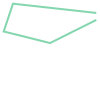

In [ ]:
from shapely.geometry import LineString

l1=LineString(pontos)
l1

In [ ]:
# Mostrar o comprimento desta linha
l1.length

91.8468590963094

c) Descubra a área e o centróide do polígono que tem esses cinco locais como vértices.

In [ ]:
# importar a biblio
from shapely.geometry import Polygon

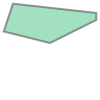

In [ ]:
plg=Polygon(pontos)
plg

In [ ]:
#  Descobrir o centroide
print(plg.centroid)

POINT (28.168970814132106 19.03993855606759)


In [ ]:
# Descobrir a área do poligono
plg.area

434.0

d) Gere o retângulo envolvente do polígono gerado em c.

In [ ]:
# Importar as biblio
from shapely.geometry import box

In [ ]:
# Extrair as coordenadas
plg.bounds
ret=box(plg.bounds[0],plg.bounds[1],plg.bounds[2],plg.bounds[3])
type(ret)


shapely.geometry.polygon.Polygon

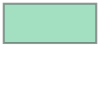

In [ ]:
ret


e) Crie uma coleção de geometrias do tipo Multiponto (MultiPoint) para armazenar a localização desses cinco lugares

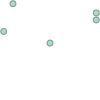

In [ ]:
# Importando as bibliotecas
from shapely.geometry import MultiPoint
mlt_pts=MultiPoint(pontos)
mlt_pts

In [ ]:
type(mlt_pts)

shapely.geometry.multipoint.MultiPoint

E2 - Criando geometrias a partir de coordenadas de um arquivo de texto

Os arquivos necessários para esse exercício podem ser encontrados aqui. Esses dados foram baixados do portal de dados abertos do EMTU e representam informações do sistema de transporte paulistano.

No arquivo stops.txt você encontra os seguintes atributos:

stop_id - número identificador da parada de ônibus
stop_name - nome da parada de ônibus
stop_lat - latitude da parada de ônibus
stop_lon - longitude da parada de ônibus
No arquivo shapes.txt você encontra os seguintes atributos:

shape_id - número identificador da linha de ônibus
shape_pt_lat - latitude da parada da linha de ônibus
shape_pt_lon - longitude da parada da linha de ônibus
shape_pt_sequence - número indicando a ordem da parada na linha
DICA: Use a função pandas.read_csv para ler os arquivos .txt, verifique o separador utilizado antes de importar o arquivo.

a) Crie geometrias do tipo Point para representar as paradas de ônibus

b) Crie um objeto do tipo LineString para representar a linha de ônibus número 177

c) Crie objetos do tipo LineString para representar cada uma das linhas de ônibus

d) Calcule a comprimento médio das linhas de ônibus

In [ ]:
# Importe as bibliotecas
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


a) Crie geometrias do tipo Point para representar as paradas de ônibus

In [ ]:
paradas=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MATERIAL_CURSO_DRIVE/stops.txt')
paradas.head()

,stop_id,stop_name,stop_lat,stop_lon
0,34,Avenida Getulio Vargas 949,-23.692008,-46.544551
1,49,Avenida Doutor Jose Fornari 550,-23.728841,-46.547956
2,76,Estrada do Montanhao 611,-23.739216,-46.526327
3,36,Av. Getulio Vargas 373 - Baeta Neves Sao Berna...,-23.695088,-46.545909
4,64,Av. Pedro Mendes 922 - Parque Selecta Sao Bern...,-23.747548,-46.529239


In [ ]:
from shapely.geometry import Point

paradas_pts=[]

for index, row in paradas.iterrows():
  ponto=Point(row['stop_lon'],row['stop_lat'])
  paradas_pts.append(ponto)



In [ ]:
paradas_pts

[<POINT (-46.545 -23.692)>,
 <POINT (-46.548 -23.729)>,
 <POINT (-46.526 -23.739)>,
 <POINT (-46.546 -23.695)>,
 <POINT (-46.529 -23.748)>,
 <POINT (-46.532 -23.743)>,
 <POINT (-46.536 -23.739)>,
 <POINT (-46.53 -23.739)>,
 <POINT (-46.525 -23.741)>,
 <POINT (-46.539 -23.735)>,
 <POINT (-46.536 -23.74)>,
 <POINT (-46.526 -23.739)>,
 <POINT (-46.53 -23.682)>,
 <POINT (-46.528 -23.698)>,
 <POINT (-46.527 -23.697)>,
 <POINT (-46.537 -23.737)>,
 <POINT (-46.528 -23.746)>,
 <POINT (-46.527 -23.686)>,
 <POINT (-46.537 -23.736)>,
 <POINT (-46.532 -23.739)>,
 <POINT (-46.537 -23.739)>,
 <POINT (-46.525 -23.697)>,
 <POINT (-46.839 -23.612)>,
 <POINT (-46.549 -23.726)>,
 <POINT (-46.522 -23.702)>,
 <POINT (-46.526 -23.745)>,
 <POINT (-46.522 -23.702)>,
 <POINT (-46.534 -23.681)>,
 <POINT (-46.53 -23.739)>,
 <POINT (-46.528 -23.687)>,
 <POINT (-46.53 -23.688)>,
 <POINT (-46.54 -23.697)>,
 <POINT (-46.531 -23.689)>,
 <POINT (-46.53 -23.691)>,
 <POINT (-46.529 -23.692)>,
 <POINT (-46.526 -23.696)>,

In [ ]:
len(paradas_pts)

42950

b) Crie um objeto do tipo LineString para representar a linha de ônibus número 177

In [ ]:
linhas=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MATERIAL_CURSO_DRIVE/shapes.txt')
linhas.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,177,-23.44323,-46.42903,0
1,177,-23.44317,-46.42902,1
2,177,-23.44316,-46.42896,2
3,177,-23.44343,-46.42879,3
4,177,-23.44369,-46.42861,4


In [ ]:
linhas.shape

(1957427, 4)

In [ ]:
pd.unique(linhas['shape_id'])

array([ 177, 1468, 5297, ...,  860,  862, 4859])

In [ ]:
linhas_sub=linhas[linhas.shape_id==177]
print(linhas_sub.shape)

(971, 4)


In [ ]:
pd.unique(linhas_sub['shape_id'])

array([177])

In [ ]:
linhas_sub.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,177,-23.44323,-46.42903,0
1,177,-23.44317,-46.42902,1
2,177,-23.44316,-46.42896,2
3,177,-23.44343,-46.42879,3
4,177,-23.44369,-46.42861,4


LINESTRING (-46.42903 -23.44323, -46.42902 -23.44317, -46.42896 -23.44316, -46.42879 -23.44343, -46.42861 -23.44369, -46.42857 -23.44374, -46.4284 -23.44403, -46.4283 -23.4442, -46.42809 -23.4445, -46.42781 -23.44491, -46.42757 -23.44529, -46.42733 -23.44567, -46.4272 -23.44589, -46.42713 -23.44601, -46.42705 -23.44612, -46.42686 -23.44639, -46.42663 -23.44668, -46.4264 -23.44693, -46.42606 -23.44732, -46.42558 -23.4479, -46.42542 -23.44809, -46.42597 -23.44817, -46.42652 -23.44824, -46.42706 -23.44831, -46.42761 -23.44837, -46.42822 -23.44846, -46.42869 -23.44853, -46.42844 -23.44884, -46.42831 -23.44899, -46.42813 -23.44917, -46.42768 -23.44913, -46.42719 -23.44908, -46.42694 -23.44904, -46.42661 -23.44901, -46.42628 -23.44896, -46.42605 -23.44893, -46.42587 -23.4489, -46.42546 -23.44885, -46.42498 -23.44878, -46.42486 -23.44875, -46.4245 -23.44916, -46.42434 -23.44934, -46.42415 -23.44956, -46.42399 -23.44973, -46.42393 -23.4498, -46.4239 -23.44991, -46.42383 -23.45003, -46.42381 -2

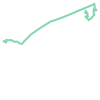

In [ ]:
from shapely.geometry import LineString

linhas_sub=linhas_sub.sort_values('shape_pt_sequence')

linhas_pts=[]

for index, row in linhas_sub.iterrows():
  ponto=Point(row['shape_pt_lon'],(row['shape_pt_lat']))
  linhas_pts.append(ponto)


linha_177=LineString(linhas_pts)
print(linha_177)
type(linha_177)
linha_177

c) Crie objetos do tipo LineString para representar cada uma das linhas de ônibus

In [ ]:
# importar a TQDM
from tqdm import tqdm

In [ ]:
linhas.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,177,-23.44323,-46.42903,0
1,177,-23.44317,-46.42902,1
2,177,-23.44316,-46.42896,2
3,177,-23.44343,-46.42879,3
4,177,-23.44369,-46.42861,4


In [ ]:
id_lin=pd.unique(linhas['shape_id'])
id_lin

array([ 177, 1468, 5297, ...,  860,  862, 4859])

In [ ]:
linhas_onibus=[]

for id in tqdm(id_lin):
   linhas_sub=linhas[linhas.shape_id==id]
   linhas_sub=linhas_sub.sort_values('shape_pt_sequence')


   linhas_pts=[]
   for index, row in linhas_sub.iterrows():
       ponto= Point(row['shape_pt_lon'], row['shape_pt_lat'])
       linhas_pts.append(ponto)

   linha=LineString(linhas_pts)
   linhas_onibus.append(linha)



100%|██████████| 1771/1771 [03:32<00:00,  8.34it/s]


In [ ]:
type(linhas_onibus)

list

In [ ]:
print(linhas_onibus)

[<LINESTRING (-46.429 -23.443, -46.429 -23.443, -46.429 -23.443, -46.429 -23....>, <LINESTRING (-47.435 -22.765, -47.435 -22.765, -47.435 -22.765, -47.435 -22....>, <LINESTRING (-47.073 -22.906, -47.072 -22.905, -47.072 -22.905, -47.072 -22....>, <LINESTRING (-46.511 -23.413, -46.511 -23.413, -46.51 -23.413, -46.51 -23.41...>, <LINESTRING (-47.085 -22.881, -47.085 -22.882, -47.085 -22.882, -47.086 -22....>, <LINESTRING (-46.799 -23.648, -46.799 -23.648, -46.799 -23.648, -46.799 -23....>, <LINESTRING (-46.922 -23.604, -46.923 -23.605, -46.922 -23.605, -46.922 -23....>, <LINESTRING (-46.624 -23.517, -46.624 -23.516, -46.624 -23.515, -46.624 -23....>, <LINESTRING (-46.922 -23.604, -46.923 -23.605, -46.923 -23.605, -46.922 -23....>, <LINESTRING (-46.831 -23.57, -46.831 -23.57, -46.831 -23.57, -46.83 -23.57, ...>, <LINESTRING (-46.63 -23.525, -46.63 -23.526, -46.63 -23.526, -46.63 -23.526,...>, <LINESTRING (-46.934 -23.543, -46.934 -23.543, -46.934 -23.543, -46.934 -23....>, <LINESTRING (-4

In [ ]:
linhas_onibus

[<LINESTRING (-46.429 -23.443, -46.429 -23.443, -46.429 -23.443, -46.429 -23....>,
 <LINESTRING (-47.435 -22.765, -47.435 -22.765, -47.435 -22.765, -47.435 -22....>,
 <LINESTRING (-47.073 -22.906, -47.072 -22.905, -47.072 -22.905, -47.072 -22....>,
 <LINESTRING (-46.511 -23.413, -46.511 -23.413, -46.51 -23.413, -46.51 -23.41...>,
 <LINESTRING (-47.085 -22.881, -47.085 -22.882, -47.085 -22.882, -47.086 -22....>,
 <LINESTRING (-46.799 -23.648, -46.799 -23.648, -46.799 -23.648, -46.799 -23....>,
 <LINESTRING (-46.922 -23.604, -46.923 -23.605, -46.922 -23.605, -46.922 -23....>,
 <LINESTRING (-46.624 -23.517, -46.624 -23.516, -46.624 -23.515, -46.624 -23....>,
 <LINESTRING (-46.922 -23.604, -46.923 -23.605, -46.923 -23.605, -46.922 -23....>,
 <LINESTRING (-46.831 -23.57, -46.831 -23.57, -46.831 -23.57, -46.83 -23.57, ...>,
 <LINESTRING (-46.63 -23.525, -46.63 -23.526, -46.63 -23.526, -46.63 -23.526,...>,
 <LINESTRING (-46.934 -23.543, -46.934 -23.543, -46.934 -23.543, -46.934 -23....>,
 <LI

d) Calcule a comprimento médio das linhas de ônibus

In [ ]:
comp_total=0

for linha in linhas_onibus:
  comp_total=comp_total+linha.length

comp_medio=comp_total/len(linhas_onibus)

comp_medio

0.2853505956684449

In [ ]:
from shapely.geometry import MultiLineString


In [ ]:
multi_linha_onibus=MultiLineString(linhas_onibus)

In [ ]:
import geopandas as gpd


In [ ]:
gdf=gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[multi_linha_onibus])



<Axes: >

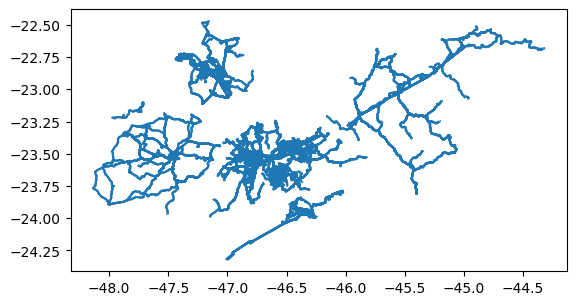

In [ ]:
gdf.plot()

DESAFIO E1 - CRIE E TESTE FUNÇÕES QUE EXECUTEM AS SEGUINTES TAREFAS

Os exercícios desafio são uma excelente oportunidade para expandir suas habilidades como programador(a).

Dica: Nesse vídeo explico em detalhes como criar funções. Escreva uma função que cria geometrias de pontos e outra que cria geometrias de linha. Use-as para resolver novamente o exercício E2a e E2b.

In [ ]:
# Função para criar pontos

def criar_pontos(tabela,coluna_long,coluna_lat):
  from shapely.geometry import Point
  paradas_pts=[]
  for index,row in tabela.iterrows():
     ponto=Point(row[coluna_long], row[coluna_lat])
     paradas_pts.append(ponto)
  return(paradas_pts)

In [ ]:
paradas.head()

,stop_id,stop_name,stop_lat,stop_lon
0,34,Avenida Getulio Vargas 949,-23.692008,-46.544551
1,49,Avenida Doutor Jose Fornari 550,-23.728841,-46.547956
2,76,Estrada do Montanhao 611,-23.739216,-46.526327
3,36,Av. Getulio Vargas 373 - Baeta Neves Sao Berna...,-23.695088,-46.545909
4,64,Av. Pedro Mendes 922 - Parque Selecta Sao Bern...,-23.747548,-46.529239


In [ ]:
pontos=criar_pontos(paradas,'stop_lon', 'stop_lat')
pontos


[<POINT (-46.545 -23.692)>,
 <POINT (-46.548 -23.729)>,
 <POINT (-46.526 -23.739)>,
 <POINT (-46.546 -23.695)>,
 <POINT (-46.529 -23.748)>,
 <POINT (-46.532 -23.743)>,
 <POINT (-46.536 -23.739)>,
 <POINT (-46.53 -23.739)>,
 <POINT (-46.525 -23.741)>,
 <POINT (-46.539 -23.735)>,
 <POINT (-46.536 -23.74)>,
 <POINT (-46.526 -23.739)>,
 <POINT (-46.53 -23.682)>,
 <POINT (-46.528 -23.698)>,
 <POINT (-46.527 -23.697)>,
 <POINT (-46.537 -23.737)>,
 <POINT (-46.528 -23.746)>,
 <POINT (-46.527 -23.686)>,
 <POINT (-46.537 -23.736)>,
 <POINT (-46.532 -23.739)>,
 <POINT (-46.537 -23.739)>,
 <POINT (-46.525 -23.697)>,
 <POINT (-46.839 -23.612)>,
 <POINT (-46.549 -23.726)>,
 <POINT (-46.522 -23.702)>,
 <POINT (-46.526 -23.745)>,
 <POINT (-46.522 -23.702)>,
 <POINT (-46.534 -23.681)>,
 <POINT (-46.53 -23.739)>,
 <POINT (-46.528 -23.687)>,
 <POINT (-46.53 -23.688)>,
 <POINT (-46.54 -23.697)>,
 <POINT (-46.531 -23.689)>,
 <POINT (-46.53 -23.691)>,
 <POINT (-46.529 -23.692)>,
 <POINT (-46.526 -23.696)>,

In [ ]:
type(pontos)

list

In [ ]:
# Função para criar inhas
def criar_linhas(tabela,coluna_sequencia,coluna_long,coluna_lat):
  from shapely.geometry import LineString, Point
  linha_sub=tabela.sort_values(by=coluna_sequencia)
  linhas_pts=[]
  for index,row in linha_sub.iterrows():
    ponto=Point(row[coluna_long], row[coluna_lat])
    linhas_pts.append(ponto)

  linha=LineString(linhas_pts)
  return(linha)

In [ ]:
linhas_sub.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
1956764,4859,-23.55899,-46.34849,0
1956765,4859,-23.55881,-46.34837,1
1956766,4859,-23.55862,-46.34823,2
1956767,4859,-23.55848,-46.34809,3
1956768,4859,-23.55842,-46.34802,4


In [ ]:
pd.unique(linhas_sub['shape_id'])

array([4859])

In [ ]:
# Testando a função criada
linha=criar_linhas(linhas_sub,'shape_pt_sequence','shape_pt_lon', 'shape_pt_lat')

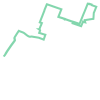

In [ ]:
linha